In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt

In [23]:
syn_data=pd.read_csv('C:/Users/SHUBHAM/Desktop/synthetic_data.csv')

syn_frame=pd.DataFrame(syn_data)


In [24]:
predictors = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]


Y=syn_data['Outcome']              # defining features and target values
X=syn_data.drop('Outcome',axis=1)


# splitting datasets into training and test datasets...
X_Train,X_test,Y_Train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)

#Scaling model
scaler = StandardScaler()
X_Train = scaler.fit_transform(X_Train)
X_test = scaler.transform(X_test)

In [25]:
'''defining a function to generate a polynomial matrix'''
def poly_matrix(X,deg):
    sample, feature  = X.shape
    X_poly = np.ones((sample,1))
    for j in range(1,deg+1):
        for i in range(feature):
            X_poly = np.hstack((X_poly,(X[:,i]**j)[:,np.newaxis])) #inserting elements (column vise) depending on power (1,x,x^2...)
    return X_poly

In [26]:
#defining a function to calculate weight and cost in a ridge regularization method for polynomial
def Ridge(x,y,lr,lamda,itr):
    
    sample,feature = x.shape      #initializing weight,cost,no. of features and samples'''
    weights = np.zeros(feature)
    cost = np.zeros(itr)
    for i in range(itr):    #applying gradient descent to calculate weights
        y_pred = np.dot(x,weights)
        grad = (2/sample)*(np.dot(y_pred-y,x) + (lamda*weights))
        weights -= lr * grad
        
        cost[i] = np.mean((y_pred - y)**2) + (lamda/sample)*np.dot(weights.T,weights)
    
    return (weights,cost)

In [27]:
l_rate = 0.001;     #learning rate
iteration = 1000;   # no. of iterations
reg_rate = 26;      # regularization rate

In [28]:
degree = 2   #Initializing degree
cost = []
X_poly_train = poly_matrix(X_Train,degree)  #creating a polynomial matrix of features
X_poly_test = poly_matrix(X_test,degree)  

#Calculating Weight and cost
W,cost = Ridge(X_poly_train,Y_Train,l_rate,reg_rate,iteration)



In [29]:
#predicting test sample
y_pred = np.dot(X_poly_test,W)

accuracy = r2_score(Y_test,y_pred)        #calculating r2_score
print('The r2_score obtained is :',round(accuracy * 100 ,3),'%')

mse = mean_squared_error(Y_test,y_pred)

print("mean squared error : ",mse)

The r2_score obtained is : 20.587 %
mean squared error :  0.18511280143870884


Text(0, 0.5, 'Cost Function')

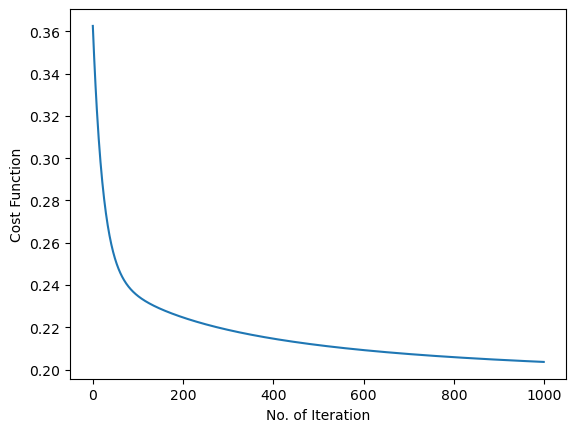

In [30]:
plt.plot(cost)
plt.xlabel("No. of Iteration")
plt.ylabel("Cost Function")

In [31]:
X_poly_test

array([[ 1.00000000e+00,  3.52704732e-01,  1.72407014e+00, ...,
         1.15245782e+00,  1.08873734e+00,  6.72031807e-01],
       [ 1.00000000e+00,  1.38249957e+00, -1.99449624e+00, ...,
         1.35306700e-02,  1.44805651e-01,  2.92695895e+00],
       [ 1.00000000e+00,  3.52704732e-01, -3.01220478e-01, ...,
         1.59490755e-01,  3.47326917e-01,  7.68502381e-04],
       ...,
       [ 1.00000000e+00, -1.02035505e+00, -1.03165316e+00, ...,
         6.34917668e-01,  3.88690270e-03,  1.03589416e+00],
       [ 1.00000000e+00,  6.95969677e-01, -1.35213050e-01, ...,
         9.44011923e-01,  4.31116881e-03,  2.73273173e-01],
       [ 1.00000000e+00,  3.52704732e-01,  3.07943779e-02, ...,
         8.00887200e-01,  3.96582257e-07,  7.68502381e-04]])